In [1]:
#Importing
import os
import sys
sys.path.insert(1,'./src')
import numpy as np
import matplotlib.pyplot as plt
from find_nearest import find_nearest
plt.style.use('bmh')
import rasterio as rio
from img_list import prs_list
import math
from read_funcs import compute_index,savenpastiff

In [2]:
#Parameter Initialization
path_l2d = "../DATABASE/"
aerial_path="../DATABASE/aerial/"
PRISMA_path="../DATABASE/PRISMA/"
name='Gad161022'
name_img_prs=prs_list[name]
tstart_prs=prs_list[name][0]
tend_prs=prs_list[name][1]
filename='PRS_L2D_STD_'+tstart_prs+'_'+tend_prs+'_0001'
print(tstart_prs)
prisma=True
validation=True
if validation: 
    area="area3"
    AREA="AREA3"
else:
    area='total_area'
if prisma:
    path=PRISMA_path
else:
    path=aerial_path
save=True

20221016102331


In [3]:
#load all binary maps and sum them (CLRE, GNDVI, NBRI, NDREI, NDVI, NRVI and SLAVI). 
CLRE=np.load(path+'index_bin/'+area+'/CLRE.npy')
GNDVI=np.load(path+'index_bin/'+area+'/GNDVI.npy')
NBRI=np.load(path+'index_bin/'+area+'/NBRI.npy')
NDREI=np.load(path+'index_bin/'+area+'/NDREI.npy')
NDVI=np.load(path+'index_bin/'+area+'/NDVI.npy')
NRVI=np.load(path+'index_bin/'+area+'/NRVI.npy')
SLAVI=np.load(path+'index_bin/'+area+'/SLAVI.npy')

frequency=CLRE+GNDVI+NBRI+NDREI+NDVI+NRVI+SLAVI

/var/folders/_3/xbqrb2pn61xbq3bc9w9ss3ww0000gn/T/ipykernel_6986/1207597557.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


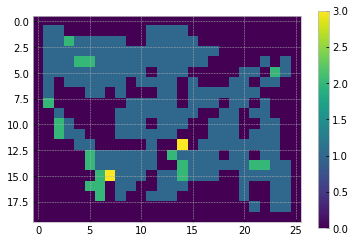

In [4]:
plt.imshow(frequency)
plt.colorbar()

In [5]:
#save map
if save:
    np.save(path+'index_bin/'+area+'/frequency',frequency)

In [6]:
#import validation classification and count pixels trees 
src = rio.open(aerial_path+'Gad_classification_area5_32632.tif')
classification=src.read()
src.close()
classification=np.moveaxis(classification,0,2)
np.shape(classification)
print(np.max(classification.ravel()))
print(np.min(classification.ravel()))
total_pixels=np.where(classification!=10,1,0).sum()
print('total: ' + str(total_pixels))
trees_pixels=np.where((classification!=5) & (classification!=0) & (classification!=1),1,0).sum()
print('trees pixels: '+ str(trees_pixels))
percentage=round((trees_pixels*100)/total_pixels)
print("percentage of healhy trees' pixels: "+str(percentage)+'%')
#import validation classification and count dead trees pixels  
print('total: ' + str(total_pixels))
deadtrees_pixels=np.where((classification==1),1,0).sum()
print('dead trees pixels: '+ str(deadtrees_pixels))
deadpercentage=math.ceil((deadtrees_pixels*100)/total_pixels)
print("percentage of dead trees' pixels: "+str(deadpercentage)+'%')

6
0
total: 201628
trees pixels: 79515
percentage of healhy trees' pixels: 39%
total: 201628
dead trees pixels: 8691
percentage of dead trees' pixels: 5%


Text(0.5, 1.0, 'Binary mask dead trees')

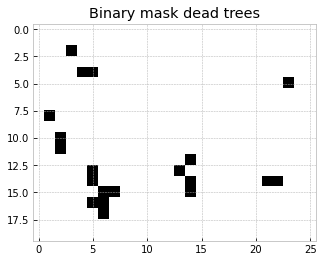

In [7]:
#compute binary map frequency by counting pixels in area5
deadthreshold=100-deadpercentage #compute the percentile threshold from the percentage of trees pixels in aerial classification
binary_frequency=np.where(frequency>np.nanpercentile(frequency,90),1,0)
#binary_deadtrees=np.where(fractions[:,:,1]>0.4,1,0)
if save:
    np.save(path+'index_bin/'+area+'/frequency_binary.npy',binary_frequency)
plt.imshow(binary_frequency,cmap='binary')
plt.title("Binary mask dead trees")